<a href="https://colab.research.google.com/github/michaelfarayola7/Data-Science-ML-Projects/blob/main/CNN_with_Basic_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.13.0'

In [2]:
# Initialize the random number generator

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
from keras.models import Sequential
import tensorflow
from tensorflow.keras.optimizers import Adam # - Works ,RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from keras import  backend as K
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D
# from keras.models import Sequential
from keras.layers import Activation, Flatten

import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

Let's load MNIST dataset

In [3]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 3


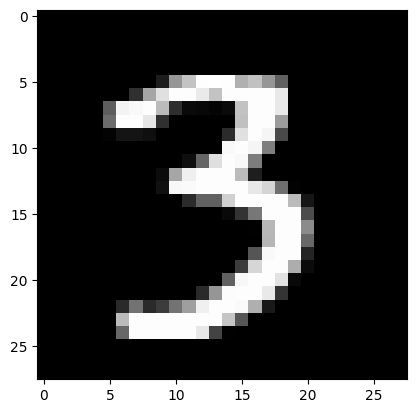

In [4]:
print("Label: {}".format(y_train[10000]))
plt.imshow(X_train[10000], cmap='gray')

# Data Preprocessing

### Print shape of the data

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Reshape train and test sets into compatible shapes
- Sequential model in tensorflow.keras expects data to be in the format (n_e, n_h, n_w, n_c)
- n_e= number of examples, n_h = height, n_w = width, n_c = number of channels
- do not reshape labels

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

### Normalize data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes with 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [8]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())


X_train shape: (60000, 28, 28, 1)
Images in X_train: 60000
Images in X_test: 10000
Max value in X_train: 1.0
Min value in X_train: 0.0


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 10
- we are doing this to use categorical_crossentropy as loss

In [9]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# print("Shape of y_train:", y_train.shape)
# print("One value of y_train:", y_train[0])

# Building Convolutional Neural Network : ConvNet/CNN~

### Initialize a sequential model again
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes

In [10]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

### Compile and fit the model
- let's compile our model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "adam"
- then next step will be to fit model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels

In [11]:
#compile the model
model.compile(loss = 'categorical_crossentropy', metrics=["accuracy"], optimizer = "adam")

In [12]:
#Fit the model
H = model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 10, validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 15s 8ms/step - loss: 0.1395 - accuracy: 0.9581 - val_loss: 0.0680 - val_accuracy: 0.9782
Epoch 2/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0419 - accuracy: 0.9871 - val_loss: 0.0548 - val_accuracy: 0.9835
Epoch 3/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0605 - val_accuracy: 0.9830
Epoch 4/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0167 - accuracy: 0.9942 - val_loss: 0.0647 - val_accuracy: 0.9843
Epoch 5/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.0691 - val_accuracy: 0.9838
Epoch 6/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.0543 - val_accuracy: 0.9872
Epoch 7/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.0707 - val_accurac

### Final loss and accuracy

In [13]:
loss, acc = model.evaluate(X_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 *acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0608 - accuracy: 0.9874

Test accuracy: 98.7%


In [14]:
loss, acc = model.evaluate(X_train, y_train)
print("\nTraining accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0251 - accuracy: 0.9951

Training accuracy: 99.5%


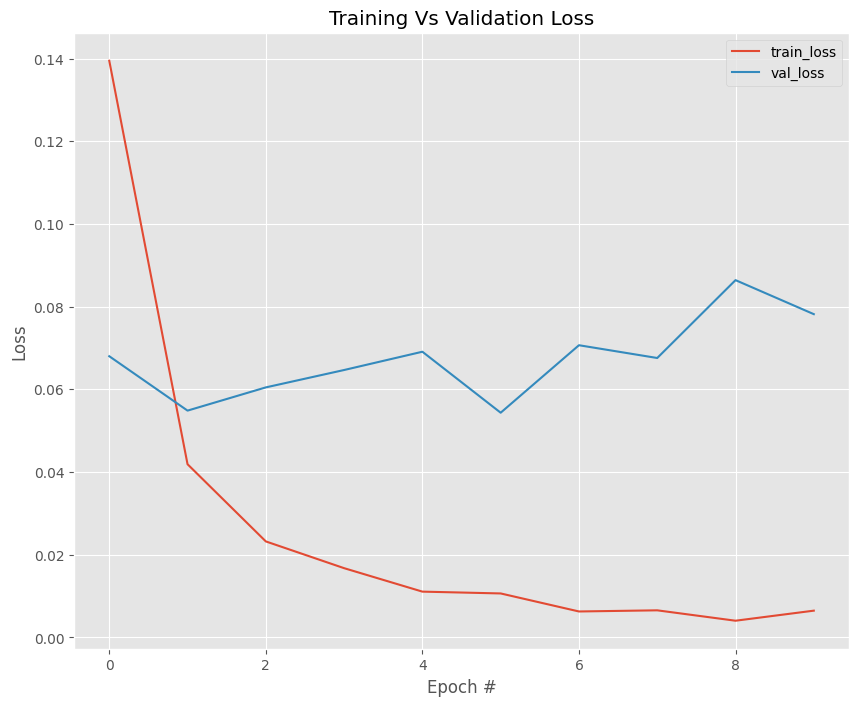

In [15]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

## Vanilla CNN + Pooling + Dropout + Regularization

### Initialize a sequential model again
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes

In [16]:
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D

# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu'
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability
model.add(Dropout(rate=0.2))

model.add(Flatten())


model.add(Dense(128, activation="relu", kernel_regularizer=tensorflow.keras.regularizers.l2(0.1))) # you can add regularization also : kernel_regularizer=tensorflow.keras.regularizers.l2(0.1)
model.add(Dense(126, activation="relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(10, activation="softmax"))

### Compile and fit the model
- let's compile our model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "adam"
- Use EarlyStopping
- then next step will be to fit model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels

In [17]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01) #min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.

# Fit the model
H = model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.7569 - accuracy: 0.9047 - val_loss: 0.3885 - val_accuracy: 0.9509
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3812 - accuracy: 0.9474 - val_loss: 0.2783 - val_accuracy: 0.9677
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3160 - accuracy: 0.9549 - val_loss: 0.3368 - val_accuracy: 0.9450
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2773 - accuracy: 0.9585 - val_loss: 0.2371 - val_accuracy: 0.9705


### Final loss and accuracy

In [18]:
loss, acc = model.evaluate(X_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.2371 - accuracy: 0.9705

Test accuracy: 97.0%


In [19]:
loss, acc = model.evaluate(X_train, y_train)
print("\nTraining accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2399 - accuracy: 0.9704

Training accuracy: 97.0%


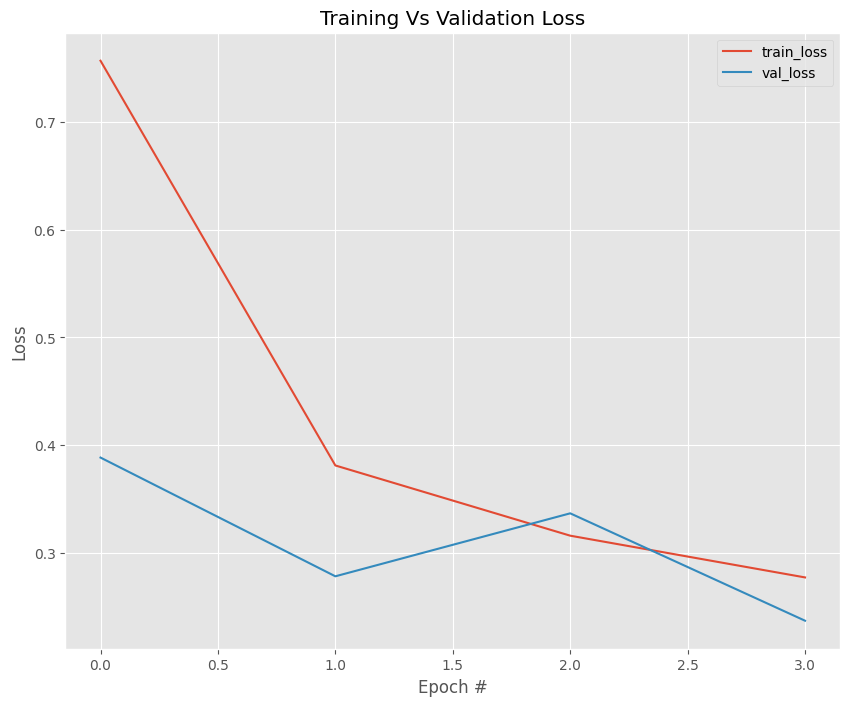

In [20]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

Let's visualize results using matplotlib

1/1 [==============================] - 0s 222ms/step
Predicted label: 6
Softmax Outputs: [[5.1503850e-04 2.9322438e-05 3.3278129e-06 5.1156239e-06 5.1833569e-05
  4.9042690e-04 9.9880302e-01 1.6058793e-07 9.5716874e-05 6.1221622e-06]]
1.0000001


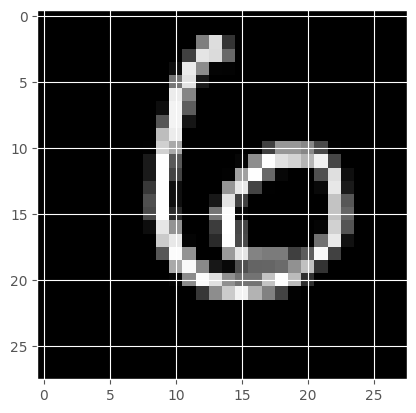

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[100].reshape(28, 28), cmap='gray')
y_pred = model.predict(X_test[100].reshape(1, 28, 28, 1)) #No.of images, Height, width, channel
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Architecture of what happened internally is shown below:

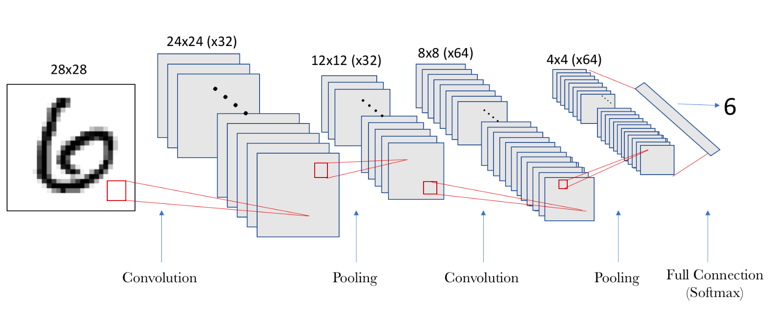